In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [16]:
#importation
df = pd.read_excel("Absenteeism_at_work.xls")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,2


In [17]:
#data info
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [18]:
cols = df.columns.tolist()
cols.pop(0)

'ID'

Text(0.5, 1.0, 'Average')

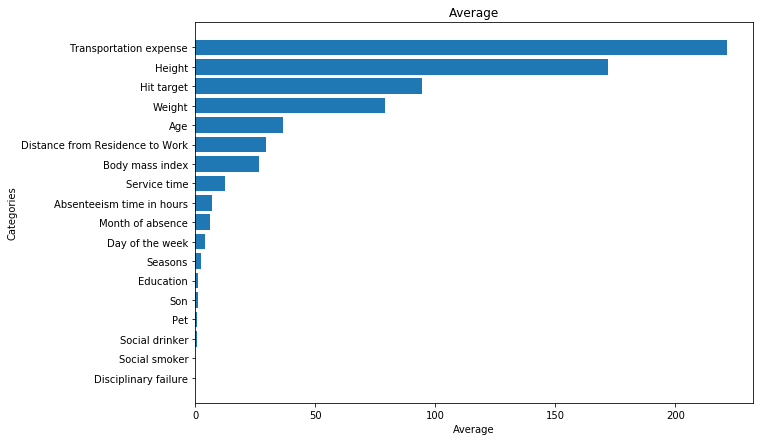

In [19]:
#ploting data pour obtenir des informations approfondies
AvgR = df[cols[1:]].mean()
AvgR = AvgR.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(cols[1:])), AvgR.values, align='center')
plt.yticks(np.arange(len(cols[1:])), AvgR.index)
plt.ylabel('Categories')
plt.xlabel('Average')
plt.title('Average')

In [20]:
#droping les Colonnes 

In [21]:
df.drop(['ID','Month of absence','Service time','Hit target','Weight','Height'],axis='columns',inplace=True)
df.head()

,Reason for absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Age,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,26,3,1,289,36,33,0,1,2,1,0,1,30,4
1,0,3,1,118,13,50,1,1,1,1,0,0,31,0
2,23,4,1,179,51,38,0,1,0,1,0,0,31,2
3,7,5,1,279,5,39,0,1,2,1,1,0,24,4
4,23,5,1,289,36,33,0,1,2,1,0,1,30,2


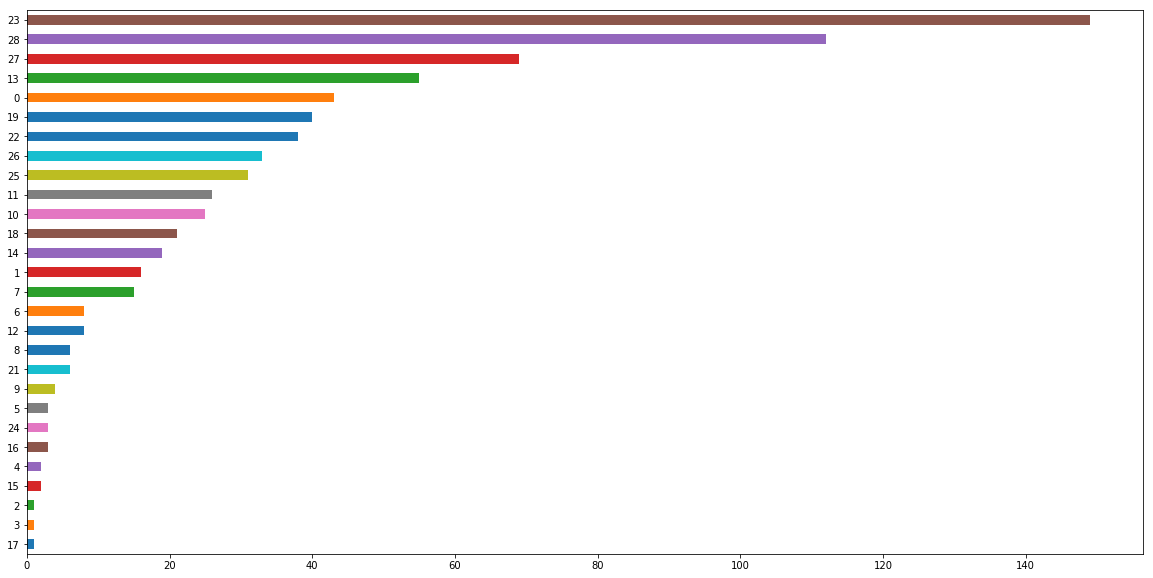

In [22]:
#the first 4 cloums has more then 58% case of absent 
df.rename(columns={"Reason for absence": "Reasonforabsence"}, inplace=True)
df.Reasonforabsence.value_counts().sort_values().plot(kind = 'barh')

In [23]:
df['Absenteeism time in hours'].replace([0],0,inplace=True)#"Parfait"
df['Absenteeism time in hours'].replace([1,2,3,4,5,6,7,8,9,10,16],1,inplace=True)#"Faible"
df['Absenteeism time in hours'].replace([24,40,32,56,48],2,inplace=True)#"Moyenne"
df['Absenteeism time in hours'].replace([120,80,64,112,104],3,inplace=True)#"Elever"
df['Absenteeism time in hours'].value_counts()

1    652
0     44
2     32
3     12
Name: Absenteeism time in hours, dtype: int64

In [10]:
df['Body mass index'].replace([24,23,19,22,21],1,inplace=True)#"Normal Weight"
df['Body mass index'].replace([25,28,27,29],2,inplace=True)#"Over Weight"
df['Body mass index'].replace([31,30,32,38,33,35,34,36],3,inplace=True)#"Obesityt"
df['Body mass index'].value_counts()

1    264
3    244
2    232
Name: Body mass index, dtype: int64

In [11]:
df['Age'].replace([28,33,30,31,32,29,27],1,inplace=True)#"[25-35]"
df['Age'].replace([38,37,40,36,41,34,43,39],2,inplace=True)#"[36-45]"
df['Age'].replace([50,47,58,48,49,46,53],3,inplace=True)#"[45:]"
df['Age'].value_counts()

2    394
1    263
3     83
Name: Age, dtype: int64

In [12]:
df['Distance from Residence to Work'].replace([10,11,12,13,14,15,16,17,5,20],1,inplace=True)#"proche "
df['Distance from Residence to Work'].replace([26,25,36,31,22,29,27,35],2,inplace=True)#"Normale"
df['Distance from Residence to Work'].replace([51,50,52,49,42,48,45],3,inplace=True)#"loin"
df['Distance from Residence to Work'].value_counts()

2    302
1    228
3    210
Name: Distance from Residence to Work, dtype: int64

In [13]:
df['Transportation expense'].value_counts()

179    180
118     92
225     81
235     58
289     45
260     42
291     40
246     30
155     29
248     24
361     24
330     16
369     15
378      8
228      8
189      8
233      7
184      7
157      7
279      6
300      5
268      3
388      3
231      2
Name: Transportation expense, dtype: int64

In [14]:
df['Transportation expense'].replace([179,118,155,189,184,157],1,inplace=True)#"pas cher "
df['Transportation expense'].replace([255,235,289,291,246,248,228,233,279,268,231,225,260],2,inplace=True)#"abordable"
df['Transportation expense'].replace([361,330,369,378,300,388],3,inplace=True)#"cher "
df['Transportation expense'].value_counts()

2    346
1    323
3     71
Name: Transportation expense, dtype: int64

In [15]:
df['Reason for absence'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

In [16]:
df['Reason for absence'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,24,25,26],5,inplace=True)#"others "
df['Reason for absence'].replace(23,1,inplace=True)#"medical consultation  "
df['Reason for absence'].replace(28,2,inplace=True)#"dental consultation"
df['Reason for absence'].replace(27,3,inplace=True)#" physiotherapy  "
df['Reason for absence'].replace(14,4,inplace=True)#" Diseases of the genitourinary system  "
df['Reason for absence'].value_counts()

5    391
1    149
2    112
3     69
4     19
Name: Reason for absence, dtype: int64

In [17]:
import pandas as pd 
import numpy as np

def logistic(x):
    return 1.0/(1 + np.exp(-x))

def logistic_deriv(x):
    return logistic(x) * (1 - logistic(x))

LR = 1   

I_dim = 13
H_dim = 4

epoch_count = 1

In [18]:
#np.random.seed(1)
weights_ItoH = np.random.uniform(-1, 1, (I_dim, H_dim))
weights_HtoO = np.random.uniform(-1, 1, H_dim)

preActivation_H = np.zeros(H_dim)
postActivation_H = np.zeros(H_dim)

training_data = df
training_data.rename(columns={"Absenteeism time in hours": "Default"}, inplace=True)

#training_data['Defaul'].unique()



target_output = training_data['Default']
training_data = training_data.drop('Default',axis = 1)



training_data = np.asarray(training_data)
training_count = len(training_data[:,0])


In [19]:
validation_data =df
validation_data.rename(columns={"Absenteeism time in hours": "Default"}, inplace=True)


validation_data['Default'].unique()
validation_output = validation_data['Default']
validation_data = validation_data.drop('Default', axis=1) 
validation_data = np.asarray(validation_data)
validation_count = len(validation_data[:,0])

In [20]:

#------------------------------training----------------------------

for epoch in range(epoch_count):
    for sample in range(training_count):
        for node in range(H_dim):
            preActivation_H[node] = np.dot(training_data[sample,:], weights_ItoH[:, node])
            postActivation_H[node] = logistic(preActivation_H[node])
            
        preActivation_O = np.dot(postActivation_H, weights_HtoO)
        postActivation_O = logistic(preActivation_O)
        
        FE = postActivation_O - target_output[sample]
        
        for H_node in range(H_dim):
            S_error = FE * logistic_deriv(preActivation_O)
            gradient_HtoO = S_error * postActivation_H[H_node]
                       
            for I_node in range(I_dim):
                input_value = training_data[sample, I_node]
                gradient_ItoH = S_error * weights_HtoO[H_node] * logistic_deriv(preActivation_H[H_node]) * input_value
                
                weights_ItoH[I_node, H_node] -= LR * gradient_ItoH
                
            weights_HtoO[H_node] -= LR * gradient_HtoO


In [21]:

#------------------------------------validation--------------------------
           
correct_classification_count = 0
for sample in range(validation_count):
    for node in range(H_dim):
        preActivation_H[node] = np.dot(validation_data[sample,:], weights_ItoH[:, node])
        postActivation_H[node] = logistic(preActivation_H[node])
            
    preActivation_O = np.dot(postActivation_H, weights_HtoO)
    postActivation_O = logistic(preActivation_O)
        
    if postActivation_O > 0.5:
        output = 1
    else:
        output = 0     
        
    if output == validation_output[sample]:
        correct_classification_count += 1

print('Percentage of correct classifications:')
print(correct_classification_count*100/validation_count)

Percentage of correct classifications:
88.10810810810811
